<a href="https://colab.research.google.com/github/shreyasingh1/A-Level-Capital-Data-Pieces/blob/master/Funding_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

import io
q1 = pd.read_csv(io.BytesIO(uploaded['q12020_csv.csv']))
q2 = pd.read_csv(io.BytesIO(uploaded['q22020_csv.csv']))
q4= pd.read_csv(io.BytesIO(uploaded['q42019_csv.csv']))

Saving q12020_csv.csv to q12020_csv (1).csv
Saving q22020_csv.csv to q22020_csv (1).csv
Saving q42019_csv.csv to q42019_csv (1).csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Initial Data Exploration**



In [ ]:
#Comparing Round Type per Quarter

q4_groupby = pd.DataFrame(q4.groupby("Round Type")['Round Type'].count())
q4_groupby['qtr'] = "q42019"
q1_groupby = pd.DataFrame(q1.groupby("Round Type")['Round Type'].count())
q1_groupby['qtr'] = "q12020"
merged = pd.concat([q4_groupby, q1_groupby])

#forgot how to rename column lol
merged['Quantity'] = merged['Round Type'] 
merged = merged.drop("Round Type", axis=1)
merged.head() #Bf is probably a typo

,qtr,Quantity
Round Type,,
A,q42019,159
B,q42019,98
Bf,q42019,1
C,q42019,64
Convertible Note,q42019,3


Text(0.5, 1.0, 'Round Type Frequency: q4_2019 and q1_2020')

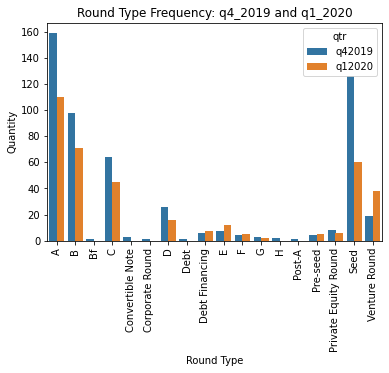

In [ ]:
#Double Bar Graph for Round Type

by_round_type = sns.barplot(x=merged.index, y= "Quantity", hue = 'qtr', data=merged)
plt.xticks(rotation=90)
plt.title('Round Type Frequency: q4_2019 and q1_2020') 

#Seems like q4_2019 is much more polarized towards seed/A rounds versus q4_2020, which is a more even distribution. 


In [ ]:
#Comparing Industry per Quarter

q4_groupby = pd.DataFrame(q4.groupby("Industry")['Industry'].count())
q4_groupby['qtr'] = "q42019"
q1_groupby = pd.DataFrame(q1.groupby("Industry")['Industry'].count())
q1_groupby['qtr'] = "q12020"
q2_groupby = pd.DataFrame(q2.groupby("Industry")['Industry'].count())
q2_groupby['qtr'] = "q22020"
merged = pd.concat([q4_groupby, q1_groupby, q2_groupby])


merged['Quantity'] = merged['Industry'] 
merged = merged.drop("Industry", axis=1)
merged.head()

,qtr,Quantity
Industry,,
Biotechnology,q42019,49
Business Products and Services,q42019,26
Comsumer Products and Services,q42019,1
Consumer Products and Services,q42019,24
Finance,q42019,17


Text(0.5, 1.0, 'Industry Type: q4_2019 and q1_2020')

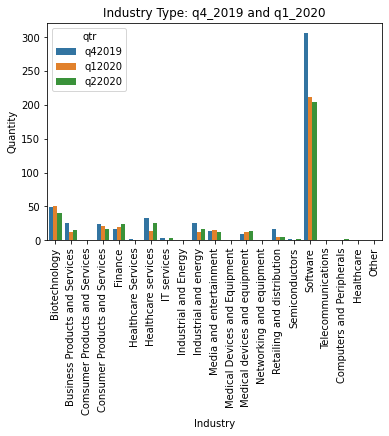

In [ ]:
#Triple Bar Graph for Industry Type

by_industry = sns.barplot(x=merged.index, y= "Quantity", hue = 'qtr', data=merged)
plt.xticks(rotation=90)
plt.title('Industry Type: q4_2019 and q1_2020') 

#Not much to see here, I think the 'industry' labels whogotfunded.com uses are bad
#****We could maybe generate a new industry column using crunchbase industry definitions*****

In [ ]:
#Comparing State where company is based, per Quarter

q4_groupby = pd.DataFrame(q4.groupby("State")['State'].count())
q4_groupby['qtr'] = "q42019"
q1_groupby = pd.DataFrame(q1.groupby("State")['State'].count())
q1_groupby['qtr'] = "q12020"
q2_groupby = pd.DataFrame(q2.groupby("State")['State'].count())
q2_groupby['qtr'] = "q22020"
merged = pd.concat([q4_groupby, q1_groupby, q2_groupby])

merged['Quantity'] = merged['State'] 
merged = merged.drop("State", axis=1)
merged.head() #Theres 2 california typo here lol

,qtr,Quantity
State,,
Arizona,q42019,2
Califormia,q42019,1
California,q42019,232
Californuia,q42019,1
Colorado,q42019,17


Text(0.5, 1.0, 'State where funded company is baseed: q4_2019 and q1_2020')

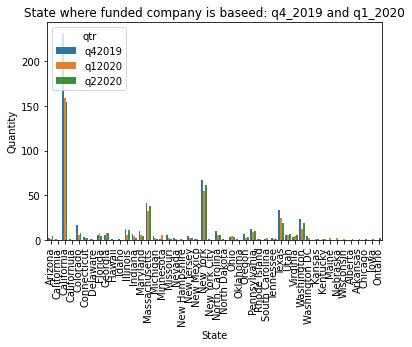

In [ ]:
#Double Bar Graph by State

by_state = sns.barplot(x=merged.index, y= "Quantity", hue = 'qtr', data=merged)
plt.xticks(rotation=90)
plt.title('State where funded company is baseed: q4_2019 and q1_2020') 

#Here is expected, CA and NY as primary peaks, and Washington and Massachusets as secondary peaks.  
#Perhaps interesting that deal volume is so much higher in california? 

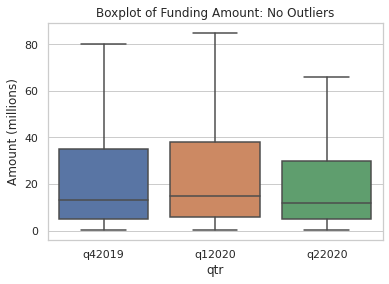

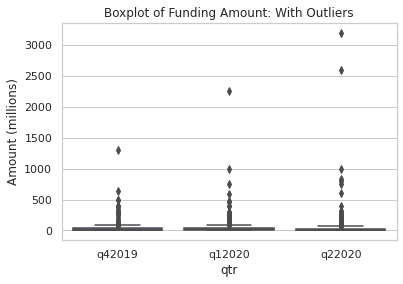

In [ ]:
#Box and Whisker Plot _ Comparing Round Sizes

q4['qtr'] = "q42019"
q1['qtr'] = "q12020"
q2['qtr'] = "q22020"
merged = pd.concat([q4, q1, q2])

sns.set(style="whitegrid")
ax = sns.boxplot(x="qtr", y="Amount (millions)", data=merged, showfliers = False)
plt.title('Boxplot of Funding Amount: No Outliers')
plt.show()

ax = sns.boxplot(x="qtr", y="Amount (millions)", data=merged)
plt.title('Boxplot of Funding Amount: With Outliers')
plt.show()

#Seems like a pretty similar distribution, especially when u take into account the outliers & how that weights it. 

before trim:  (1049336, 10)
after trim:  (1158, 10)


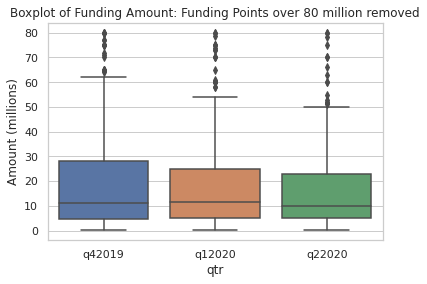

In [ ]:
#Graphing boxplot with large points removed

merged_trimmed = merged[merged['Amount (millions)'] <=80]  
print('before trim: ', merged.shape)
print('after trim: ', merged_trimmed.shape)

sns.set(style="whitegrid")
ax = sns.boxplot(x="qtr", y="Amount (millions)", data=merged_trimmed, showfliers = True)
plt.title('Boxplot of Funding Amount: Funding Points over 80 million removed')
plt.show()

#This is with funding points that are over 80 million removed, as to not skew the plot.  We can see a little more variation in the mean/upper quartile her

**Time Series Exploration**


In [16]:
#prepping individual quarter data for graphing

q4['Date'] = pd.to_datetime(q4['Date']) #Converting Date into a datetime object
q4_groupby = pd.DataFrame(q4.groupby("Date")['Date'].count()) #grouping by date
q4_groupby_day = q4_groupby.resample('D').sum() #grouping datetime index by day
q4_groupby_week = q4_groupby.resample('W').sum() #grouping datetime index by week
q4_groupby_month = q4_groupby.resample('M').sum() #grouping datetime index by month
q4_groupby_day['Quarter'] = "q42019" #adding quarter label to grouped d/w/m data
q4_groupby_week['Quarter'] = "q42019"
q4_groupby_month['Quarter'] = "q42019"


q1['Date'] = pd.to_datetime(q1['Date'])
q1_groupby = pd.DataFrame(q1.groupby("Date")['Date'].count())
q1_groupby_day = q1_groupby.resample('D').sum() 
q1_groupby_week = q1_groupby.resample('W').sum() 
q1_groupby_month = q1_groupby.resample('M').sum() 
q1_groupby_day['Quarter'] = "q12020" 
q1_groupby_week['Quarter'] = "q12020"
q1_groupby_month['Quarter'] = "q12020"


q2['Date'] = pd.to_datetime(q2['Date'])
q2_groupby = pd.DataFrame(q2.groupby("Date")['Date'].count())
q2_groupby_day = q2_groupby.resample('D').sum() 
q2_groupby_week = q2_groupby.resample('W').sum() 
q2_groupby_month = q2_groupby.resample('M').sum() 
q2_groupby_day['Quarter'] = "q22020" 
q2_groupby_week['Quarter'] = "q22020"
q2_groupby_month['Quarter'] = "q22020"

#merging data

merged_groupby_day = pd.concat([q4_groupby_day, q1_groupby_day, q2_groupby_day])
merged_groupby_week = pd.concat([q4_groupby_week, q1_groupby_week, q2_groupby_week])
merged_groupby_month = pd.concat([q4_groupby_month, q1_groupby_month, q2_groupby_month])

#manually adjusting q1 and q2 start dates in the week and month groupings, so the graphs below will be continous
merged_groupby_week = merged_groupby_week.append(pd.DataFrame({'Date' : 5 , 'Quarter' : 'q12020'}, index=[q1_groupby_day.index[0]])) #making 1-1-20 = 12-29-19
merged_groupby_week = merged_groupby_week.append(pd.DataFrame({'Date' : 12 , 'Quarter' : 'q22020'}, index=[q2_groupby_day.index[0]])) #making 4-1-20 = 3-29-20


merged_groupby_month = merged_groupby_month.append(pd.DataFrame({'Date' : 230.0 , 'Quarter' : 'q42019'}, index=[q4_groupby_day.index[0]])) #start of october** estimate
merged_groupby_month = merged_groupby_month.append(pd.DataFrame({'Date' : 154.0 , 'Quarter' : 'q12020'}, index=[q4_groupby_day.index[-1]])) #making 1-1-20 = 12-31-19
merged_groupby_month = merged_groupby_month.append(pd.DataFrame({'Date' : 110.0 , 'Quarter' : 'q22020'}, index=[q1_groupby_day.index[-1]])) #making 4-1-20 = 3-31-20


Text(0, 0.5, 'Number of Deals per Month')

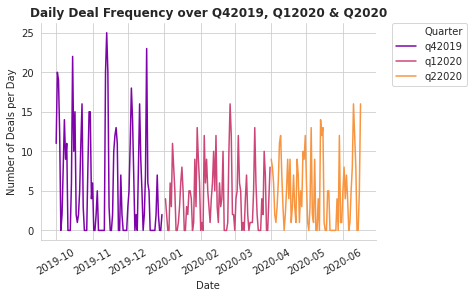

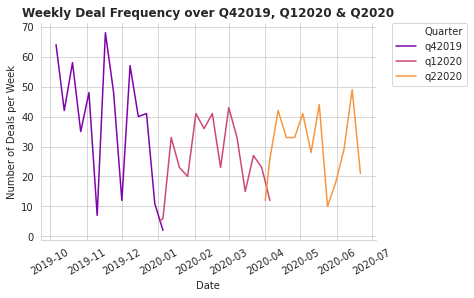

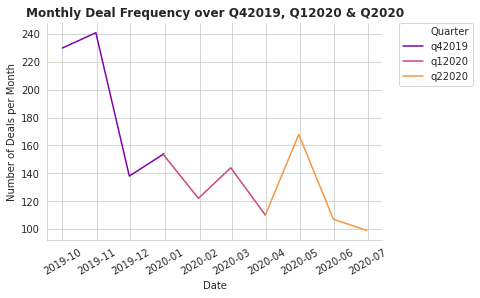

In [17]:
#5. Counts Plot (Day, week, month)

plt.figure() #by day
sns.set_style("whitegrid")
ax = sns.lineplot(x=merged_groupby_day.index, y=merged_groupby_day['Date'], data=merged_groupby_day, hue = 'Quarter', palette="plasma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation=30)
plt.title('Daily Deal Frequency over Q42019, Q12020 & Q2020', weight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Deals per Day')

plt.figure() #by week
ax = sns.lineplot(x=merged_groupby_week.index, y=merged_groupby_week['Date'], data=merged_groupby_week, hue = 'Quarter', palette="plasma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation=30)
plt.title('Weekly Deal Frequency over Q42019, Q12020 & Q2020', weight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Deals per Week')

plt.figure() #by month
ax = sns.lineplot(x=merged_groupby_month.index, y=merged_groupby_month['Date'], data=merged_groupby_month, hue = 'Quarter', palette="plasma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation=30)
plt.title('Monthly Deal Frequency over Q42019, Q12020 & Q2020', weight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Deals per Month')

Looking at just Deal frequency by state

In [18]:
q4['Date'] = pd.to_datetime(q4['Date']) #Converting Date into a datetime object
q1['Date'] = pd.to_datetime(q1['Date']) 
q2['Date'] = pd.to_datetime(q2['Date']) 

q4_CA = q4.loc[q4['State'] == 'California'] #subsetting dfs by cali
q1_CA = q1.loc[q1['State'] == 'California']
q2_CA = q2.loc[q2['State'] == 'California']
q4_NY = q4.loc[q4['State'] == 'New York'] #subsetting dfs by ny
q1_NY = q1.loc[q1['State'] == 'New York']
q2_NY = q2.loc[q2['State'] == 'New York']
q4_WA = q4.loc[q4['State'] == 'Washington'] #subsetting dfs by washington state
q1_WA = q1.loc[q1['State'] == 'Washington']
q2_WA = q2.loc[q2['State'] == 'Washington']
q4_MA = q4.loc[q4['State'] == 'Massachusetts'] #subsetting dfs by massachusetts
q1_MA = q1.loc[q1['State'] == 'Massachusetts']
q2_MA = q2.loc[q2['State'] == 'Massachusetts']


#q4
q4_groupby_CA = pd.DataFrame(q4_CA.groupby("Date")['Date'].count()) #grouping by date
q4_groupby_NY = pd.DataFrame(q4_NY.groupby("Date")['Date'].count()) 
q4_groupby_WA = pd.DataFrame(q4_WA.groupby("Date")['Date'].count()) 
q4_groupby_MA = pd.DataFrame(q4_MA.groupby("Date")['Date'].count()) 

q4_groupby_week_CA = q4_groupby_CA.resample('W').sum() #grouping datetime index by week
q4_groupby_week_NY = q4_groupby_NY.resample('W').sum() 
q4_groupby_week_WA = q4_groupby_WA.resample('W').sum() 
q4_groupby_week_MA = q4_groupby_MA.resample('W').sum() 

q4_groupby_week_CA['Quarter'] = "q42019" #adding quarter label
q4_groupby_week_NY['Quarter'] = "q42019"
q4_groupby_week_WA['Quarter'] = "q42019"
q4_groupby_week_MA['Quarter'] = "q42019"

#q1
q1_groupby_CA = pd.DataFrame(q1_CA.groupby("Date")['Date'].count()) #grouping by date
q1_groupby_NY = pd.DataFrame(q1_NY.groupby("Date")['Date'].count()) 
q1_groupby_WA = pd.DataFrame(q1_WA.groupby("Date")['Date'].count()) 
q1_groupby_MA = pd.DataFrame(q1_MA.groupby("Date")['Date'].count()) 

q1_groupby_week_CA = q1_groupby_CA.resample('W').sum() #grouping datetime index by week
q1_groupby_week_NY = q1_groupby_NY.resample('W').sum() 
q1_groupby_week_WA = q1_groupby_WA.resample('W').sum() 
q1_groupby_week_MA = q1_groupby_MA.resample('W').sum() 

q1_groupby_week_CA['Quarter'] = "q12020" #adding quarter label
q1_groupby_week_NY['Quarter'] = "q12020"
q1_groupby_week_WA['Quarter'] = "q12020"
q1_groupby_week_MA['Quarter'] = "q12020"


#q2
q2_groupby_CA = pd.DataFrame(q2_CA.groupby("Date")['Date'].count()) #grouping by date
q2_groupby_NY = pd.DataFrame(q2_NY.groupby("Date")['Date'].count()) 
q2_groupby_WA = pd.DataFrame(q2_WA.groupby("Date")['Date'].count()) 
q2_groupby_MA = pd.DataFrame(q2_MA.groupby("Date")['Date'].count()) 

q2_groupby_week_CA = q2_groupby_CA.resample('W').sum() #grouping datetime index by week
q2_groupby_week_NY = q2_groupby_NY.resample('W').sum() 
q2_groupby_week_WA = q2_groupby_WA.resample('W').sum() 
q2_groupby_week_MA = q2_groupby_MA.resample('W').sum() 

q2_groupby_week_CA['Quarter'] = "q22020" #adding quarter label
q2_groupby_week_NY['Quarter'] = "q22020"
q2_groupby_week_WA['Quarter'] = "q22020"
q2_groupby_week_MA['Quarter'] = "q22020"

#merging data

merged_groupby_week_CA = pd.concat([q4_groupby_week_CA, q1_groupby_week_CA, q2_groupby_week_CA])
merged_groupby_week_NY = pd.concat([q4_groupby_week_NY, q1_groupby_week_NY, q2_groupby_week_NY])
merged_groupby_week_WA = pd.concat([q4_groupby_week_WA, q1_groupby_week_WA, q2_groupby_week_WA])
merged_groupby_week_MA = pd.concat([q4_groupby_week_MA, q1_groupby_week_MA, q2_groupby_week_MA])

#renaming columns in a really bad way sorry

merged_groupby_week_CA['California'] = merged_groupby_week_CA['Date']
merged_groupby_week_CA = merged_groupby_week_CA.drop(columns = ['Date'])
merged_groupby_week_NY['New York'] = merged_groupby_week_NY['Date']
merged_groupby_week_NY = merged_groupby_week_NY.drop(columns = ['Date'])
merged_groupby_week_WA['Washington'] = merged_groupby_week_WA['Date']
merged_groupby_week_WA = merged_groupby_week_WA.drop(columns = ['Date'])
merged_groupby_week_MA['Massachusetts'] = merged_groupby_week_MA['Date']
merged_groupby_week_MA = merged_groupby_week_MA.drop(columns = ['Date'])
merged_states = pd.concat([merged_groupby_week_CA, merged_groupby_week_NY, merged_groupby_week_WA, merged_groupby_week_MA])
merged_states = merged_states.drop(columns = ['Quarter'])

Text(0, 0.5, 'Number of Deals per Week')

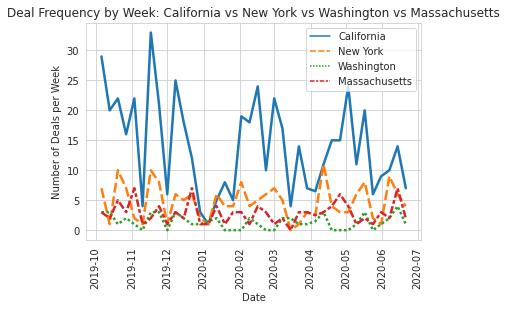

In [19]:
#5. Counts Plot for Cali, NY, Washington, Massachusetts

#graphing
sns.lineplot(data=merged_states, palette="tab10", linewidth=2.5)
plt.xticks(rotation=90)
plt.title('Deal Frequency by Week: California vs New York vs Washington vs Massachusetts')
plt.xlabel('Date')
plt.ylabel('Number of Deals per Week')

Round amount over time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

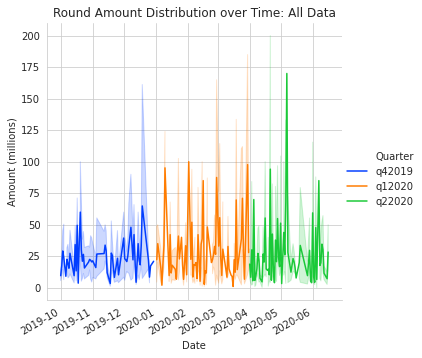

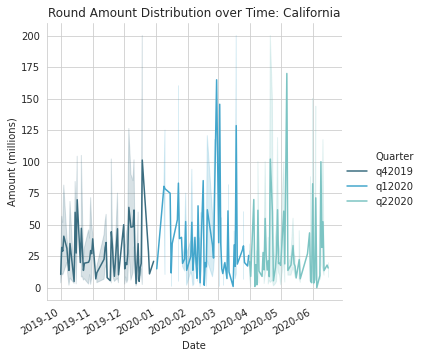

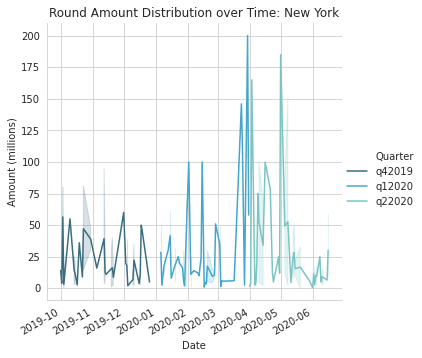

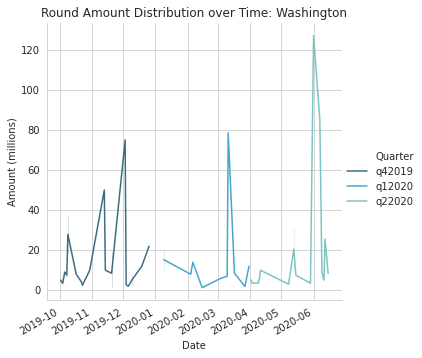

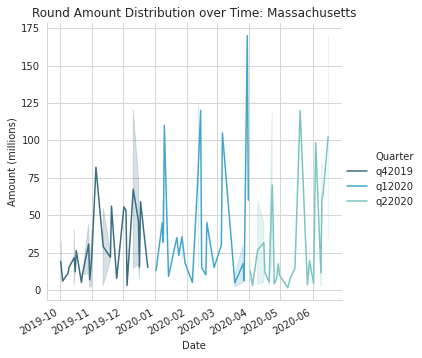

In [20]:
#prepping individual quarter data for graphing - amount vs time

#general trends
q4['Quarter'] = "q42019"
q1['Quarter'] = "q12020"
q2['Quarter'] = "q22020"
merged = pd.concat([q4, q1, q2])
merged['Date'] = pd.to_datetime(merged['Date']) #Converting Date into a datetime object
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = "Quarter", palette = 'bright')
plt.title('Round Amount Distribution over Time: All Data')
g.fig.autofmt_xdate()

#California

q4_CA['Quarter'] = "q42019"
q1_CA['Quarter'] = "q12020"
q2_CA['Quarter'] = "q22020"
merged = pd.concat([q4_CA, q1_CA, q2_CA])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'GnBu_d')
plt.title('Round Amount Distribution over Time: California')
g.fig.autofmt_xdate()

#New York
q4_NY['Quarter'] = "q42019"
q1_NY['Quarter'] = "q12020"
q2_NY['Quarter'] = "q22020"
merged = pd.concat([q4_NY, q1_NY, q2_NY])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'GnBu_d')
plt.title('Round Amount Distribution over Time: New York')
g.fig.autofmt_xdate()

#Washington
q4_WA['Quarter'] = "q42019"
q1_WA['Quarter'] = "q12020"
q2_WA['Quarter'] = "q22020"
merged = pd.concat([q4_WA, q1_WA, q2_WA])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'GnBu_d')
plt.title('Round Amount Distribution over Time: Washington')
g.fig.autofmt_xdate()

#Massachusetts
q4_MA['Quarter'] = "q42019"
q1_MA['Quarter'] = "q12020"
q2_MA['Quarter'] = "q22020"
merged = pd.concat([q4_MA, q1_MA, q2_MA])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'GnBu_d')
plt.title('Round Amount Distribution over Time: Massachusetts')
g.fig.autofmt_xdate()



Comparing avg deal size AND deal qualtity per state

Text(0.5, 1.0, 'US: Number of Deals per Week over Q42019, Q12020, & Q22020')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

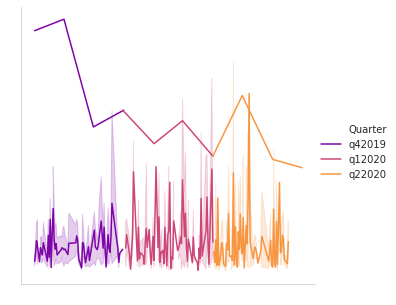

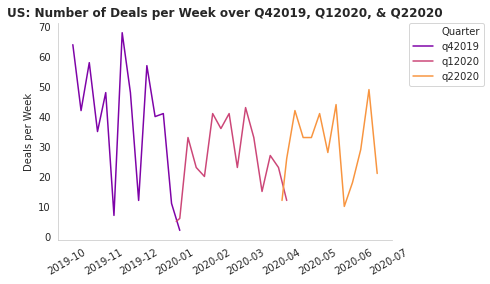

In [27]:
#ALL DATA

#getting a graph for all US data of round amount over time
merged = pd.concat([q4, q1, q2])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  

#graphing subplot 1
plt.figure()
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine(left=True, bottom = True)
plt.subplots(0,0)
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'plasma')
g.fig.autofmt_xdate()
ax = sns.lineplot(x=merged_groupby_month.index, y=merged_groupby_month['Date'], data=merged_groupby_month, hue = 'Quarter', palette="plasma", legend = False)
plt.yticks(labels = None, ticks = [])
plt.ylabel(' ')
plt.xticks(labels = None, ticks = [])
plt.xlabel(' ')
#plt.title('US: Average Daily Round Size over Q42019, Q12020, & Q22020', weight = 'bold')


#graph of number of rounds per week/subplot 2
plt.subplots(0,1)
ax = sns.lineplot(x=merged_groupby_week.index, y=merged_groupby_week['Date'], data=merged_groupby_week, hue = 'Quarter', palette="plasma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation = 30)
plt.ylabel('Deals per Week')
plt.title('US: Number of Deals per Week over Q42019, Q12020, & Q22020', weight = 'bold')


Text(0.5, 1.0, 'CALIFORNIA: Number of Deals per Week over Q42019, Q12020, & Q22020')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

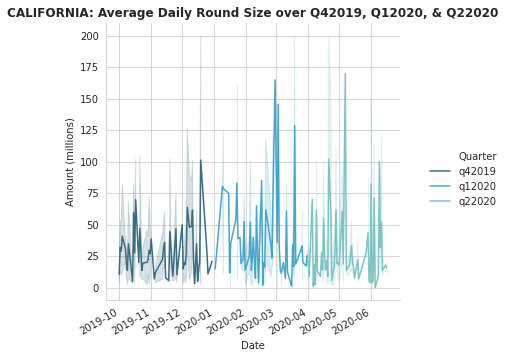

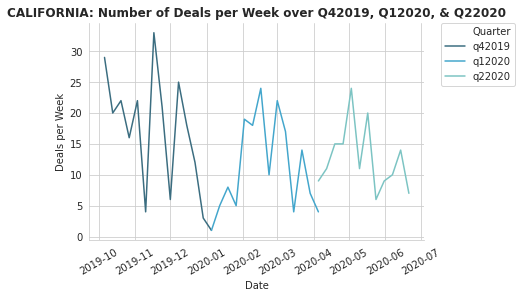

In [ ]:
#California

#getting ca traph of round amount over time
merged = pd.concat([q4_CA, q1_CA, q2_CA])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  

#graphing subplot 1
plt.figure()
sns.set_style("whitegrid")
plt.subplots(0,0)
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'GnBu_d')
g.fig.autofmt_xdate()
plt.title('CALIFORNIA: Average Daily Round Size over Q42019, Q12020, & Q22020', weight = 'bold')


#graph of number of rounds per week/subplot 2
plt.subplots(0,1)
ax = sns.lineplot(x=merged_groupby_week_CA.index, y=merged_groupby_week_CA['California'], data=merged_groupby_week_CA, hue = 'Quarter', palette="GnBu_d")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation = 30)
plt.ylabel('Deals per Week')
plt.title('CALIFORNIA: Number of Deals per Week over Q42019, Q12020, & Q22020', weight = 'bold')


Text(0.5, 1.0, 'NEW YORK: Number of Deals per Week over Q42019, Q12020, & Q22020')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

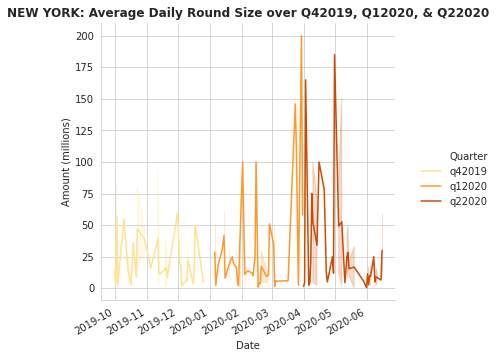

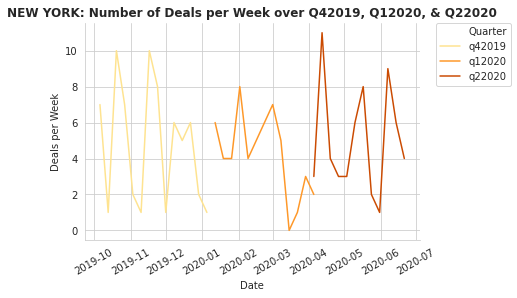

In [ ]:
#New York

#getting ny traph of round amount over time
merged = pd.concat([q4_NY, q1_NY, q2_NY])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  

#graphing subplot 1
plt.figure()
sns.set_style("whitegrid")
plt.subplots(0,0)
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'YlOrBr')
g.fig.autofmt_xdate()
plt.title('NEW YORK: Average Daily Round Size over Q42019, Q12020, & Q22020', weight = 'bold')


#graph of number of rounds per week/subplot 2
plt.subplots(0,1)
ax = sns.lineplot(x=merged_groupby_week_NY.index, y=merged_groupby_week_NY['New York'], data=merged_groupby_week_NY, hue = 'Quarter', palette="YlOrBr")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation = 30)
plt.ylabel('Deals per Week')
plt.title('NEW YORK: Number of Deals per Week over Q42019, Q12020, & Q22020', weight = 'bold')

Text(0.5, 1.0, 'WASHINGTON: Number of Deals per Week over Q42019, Q12020, & Q22020')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

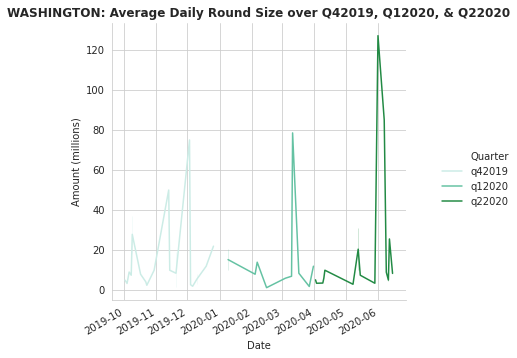

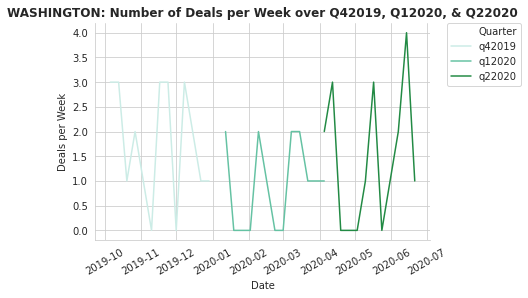

In [ ]:
#Washington

#getting wa traph of round amount over time
merged = pd.concat([q4_WA, q1_WA, q2_WA])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  

#graphing subplot 1
plt.figure()
sns.set_style("whitegrid")
plt.subplots(0,0)
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'BuGn')
g.fig.autofmt_xdate()
plt.title('WASHINGTON: Average Daily Round Size over Q42019, Q12020, & Q22020', weight = 'bold')


#graph of number of rounds per week/subplot 2
plt.subplots(0,1)
ax = sns.lineplot(x=merged_groupby_week_WA.index, y=merged_groupby_week_WA['Washington'], data=merged_groupby_week_WA, hue = 'Quarter', palette="BuGn")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation = 30)
plt.ylabel('Deals per Week')
plt.title('WASHINGTON: Number of Deals per Week over Q42019, Q12020, & Q22020', weight = 'bold')

Text(0.5, 1.0, 'MASSACHUSETTS: Number of Deals per Week over Q42019, Q12020, & Q22020')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

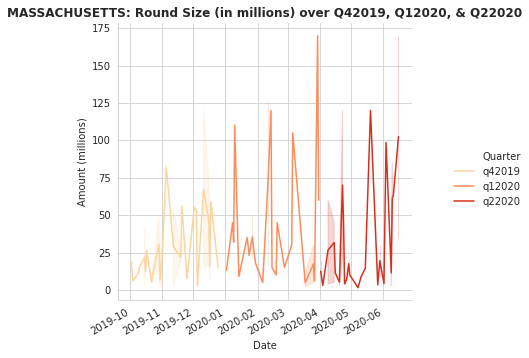

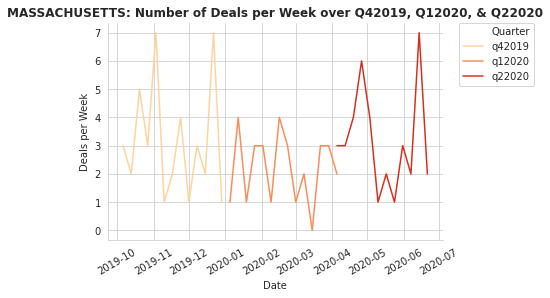

In [ ]:
#Massachusetts

#getting ma traph of round amount over time
merged = pd.concat([q4_MA, q1_MA, q2_MA])
merged['Date'] = pd.to_datetime(merged['Date']) 
merged_trimmed = merged[merged['Amount (millions)'] <= 200]  

#graphing subplot 1
plt.figure()
sns.set_style("whitegrid")
plt.subplots(0,0)
g = sns.relplot(x="Date", y="Amount (millions)", kind="line", data=merged_trimmed, hue = 'Quarter', palette = 'OrRd')
g.fig.autofmt_xdate()
plt.title('MASSACHUSETTS: Round Size (in millions) over Q42019, Q12020, & Q22020', weight = 'bold')


#graph of number of rounds per week/subplot 2
plt.subplots(0,1)
ax = sns.lineplot(x=merged_groupby_week_MA.index, y=merged_groupby_week_MA['Massachusetts'], data=merged_groupby_week_MA, hue = 'Quarter', palette="OrRd")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xticks(rotation = 30)
plt.ylabel('Deals per Week')
plt.title('MASSACHUSETTS: Number of Deals per Week over Q42019, Q12020, & Q22020', weight = 'bold')